# Init

In [ ]:
!pip install multidict
!pip install kneed
!pip install stop_words
!pip install transformers
!pip install adjustText
!pip install pyspellchecker

import pickle
import multidict as multidict
import os
import re
import pandas as pd
import numpy as np
import psycopg2
from datetime import datetime
import xlrd
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text
from tqdm.notebook import tqdm

#####
import spacy
import nltk
from nltk.corpus import stopwords
from collections import Counter
import string
import time
from IPython.display import clear_output
import pickle
from scipy.spatial.distance import cdist

#####
import torch
import math
from transformers import BertTokenizer, BertModel, BertForMaskedLM, AutoModel, AutoTokenizer
import logging

/usr/local/lib/python3.6/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
!pip install more-itertools

main_file_it = 'drive/My Drive/ita_10k.json'
main_file_en = 'drive/My Drive/eng_10k_1.json'

main_file_it_dump_1 = 'drive/My Drive/Copia di it_270520.json'
main_file_it_dump_2 = 'https://drive.google.com/file/d/1Z0c0JXbgpSTOJ45h_bjisR35dwJDltCP/view?usp=sharing'

import json
from itertools import zip_longest

def grouper(iterable, n, fillvalue=None):
    "Collect data into fixed-length chunks or blocks"
    # grouper('ABCDEFG', 3, 'x') --> ABC DEF Gxx
    args = [iter(iterable)] * n
    return zip_longest(fillvalue=fillvalue, *args)

for i, group in enumerate(grouper('Copia di it_270520.json', 10000)):
    with open('outputbatch_{}.json'.format(i), 'w') as outputfile:
        json.dump(list(group), outputfile)

# BERT IT/EN MODEL

In [ ]:
tokenizer_it= BertTokenizer.from_pretrained('dbmdz/bert-base-italian-xxl-uncased')
model_it = BertModel.from_pretrained('dbmdz/bert-base-italian-xxl-uncased')
model_it.eval()

/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils.py:831: FutureWarning: Parameter max_len is deprecated and will be removed in a future release. Use model_max_length instead.
  category=FutureWarning,


BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(32102, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
          

In [ ]:
tokenizer_en = BertTokenizer.from_pretrained('bert-base-uncased')
model_en = BertModel.from_pretrained('bert-base-uncased')
model_en.eval()

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
          

# Processing Data

In [ ]:


#data_it = pd.read_json(main_file_it, lines=True)

#nltk.download('stopwords')
#it_stop_words = set(stopwords.words('italian'))
#it_stop_words.add("rt")
#print(it_stop_words)
#print(data_it.shape)

#sent_ = []
#for a in tqdm(range(data_it.shape[0])):
#    frase = ' '.join(re.findall('[a-zA-Zà-ù]+', data_it['text'].loc[a]))
#    no_stops = ' '.join([x for x in frase.lower().split(' ') if x not in it_stop_words])
#    sent_.append(no_stops)

#data_it['Spellchecked'] = sent_



#data_en = pd.read_json(main_file_en, lines=True)

#nltk.download('stopwords')
#en_stop_words = set(stopwords.words('english'))
#en_stop_words.add("rt")
#print(en_stop_words)
#print(data_en.shape)

#sent_ = []
#for a in tqdm(range(data_en.shape[0])):
#    frase = ' '.join(re.findall('[a-zA-Zà-ù]+', data_en['text'].loc[a]))
#    no_stops = ' '.join([x for x in frase.lower().split(' ') if x not in en_stop_words])
#    sent_.append(no_stops)

#data_en['Spellchecked'] = sent_

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
{'ha', 'tuo', 'fosse', 'vostro', 'l', 'coi', 'abbiate', 'noi', 'mi', 'facesse', 'starebbe', 'avremmo', 'nei', 'sui', 'loro', 'ma', 'agli', 'al', 'chi', 'fossi', 'facendo', 'stavate', 'farà', 'sarei', 'mia', 'ebbe', 'stareste', 'farete', 'avuta', 'fareste', 'e', 'avrete', 'sugli', 'ne', 'delle', 'siate', 'starebbero', 'farebbero', 'stessi', 'staremmo', 'ad', 'a', 'i', 'avuti', 'saremo', 'nostri', 'sei', 'aveva', 'steste', 'farò', 'in', 'nell', 'sul', 'sarà', 'saremmo', 'farei', 'suoi', 'lui', 'avessimo', 'facevate', 'starò', 'avute', 'per', 'tua', 'vostri', 'avrà', 'dai', 'contro', 'anche', 'feci', 'staranno', 'stesse', 'stiate', 'il', 'stesti', 'erano', 'avemmo', 'stette', 'quelle', 'più', 'fossero', 'fossimo', 'un', 'stavi', 'foste', 'fosti', 'stessero', 'dell', 'da', 'avessero', 'dello', 'eri', 'quello', 'siete', 'ero', 'avreste', 'farebbe', 'facesti', 'faceste', 'faremmo', 


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
{'from', 'during', 'only', 'm', "you're", "you'd", 'hers', 'do', "couldn't", 'into', 'won', 'this', 'who', "you'll", 'under', 'to', 'by', 's', 'ma', 'there', 'just', 'these', 'no', "shan't", 'didn', 'ain', 'those', 'he', 'now', 'so', 'my', 'had', 'up', 'because', 'they', 'against', 'itself', 'a', 'i', 'she', "haven't", 'yourselves', 'in', 'y', 'for', 'them', "won't", 'as', 'wouldn', 'ourselves', 'whom', 'what', 'why', 'hadn', 'too', 'few', "mustn't", 'at', 'that', 'their', 'when', 'has', 'then', 'between', 'will', 'you', 'him', "didn't", 'more', 'our', 't', 'me', 'your', 'is', 'are', 'off', 'were', 'any', 'than', 'isn', 'but', 'again', 'which', 'be', "wasn't", "weren't", "don't", 'through', "mightn't", 'above', 'mightn', 'if', 'having', 'very', 'll', 'nor', 'am', 'or', 'haven', 'with', 'rt', 'can', 'his', 'how', 'and', 'such', 'other', 'been', 'o', 'while', 'below', '

In [ ]:
data_dump_it_1 = pd.read_json(main_file_it_dump_1, lines=True)

In [ ]:
from nltk.tokenize import TweetTokenizer

nltk.download('stopwords')

data_it = pd.read_json(main_file_it, lines=True)
data_en = pd.read_json(main_file_en, lines=True)

tokenizer = TweetTokenizer(preserve_case=False, reduce_len=True, strip_handles=True)
it_stop_words = set(stopwords.words('italian'))
it_stop_words.add("rt")
data_it['text'] = data_it['text'].apply(tokenizer.tokenize).apply(" ".join)
data_it['text'] = data_it['text'].apply(lambda s: s.translate(str.maketrans('','', string.punctuation)).lower())
data_it['text'] = data_it['text'].replace(r'http\S+', '', regex = True) #REMOVE URLS
data_it['text'] = data_it['text'].replace(r'(?:\#+[\w_]+[\w\'_\-]*[\w_]+)', '', regex=True)
data_it['text'] = data_it['text'].replace(r'(?:@[\w_]+)','you', regex = True)
data_it['text'] = data_it['text'].replace(r'[^\w\s]','', regex = True)
data_it['text'] = data_it['text'].replace(r"(.)\1{2,}",r"\1",regex=True)
data_it['text'] = data_it['text'].replace('\t', '')
data_it['tokenized_text'] = data_it['text'].apply(tokenizer.tokenize)
data_it['tokenized_text'] = data_it['tokenized_text'].apply(lambda x: [w for w in x if not w in it_stop_words if len(x) > 1])
data_it['processed_text'] = data_it['tokenized_text'].apply(" ".join)


en_stop_words = set(stopwords.words('english'))
en_stop_words.add("rt")
data_en['text'] = data_en['text'].apply(tokenizer.tokenize).apply(" ".join)
data_en['text'] = data_en['text'].apply(lambda s: s.translate(str.maketrans('','', string.punctuation)).lower())
data_en['text'] = data_en['text'].replace(r'http\S+', '', regex = True) #REMOVE URLS
data_en['text'] = data_en['text'].replace(r'(?:\#+[\w_]+[\w\'_\-]*[\w_]+)', '', regex=True)
data_en['text'] = data_en['text'].replace(r'(?:@[\w_]+)','you', regex = True)
data_en['text'] = data_en['text'].replace(r'[^\w\s]','', regex = True)
data_en['text'] = data_en['text'].replace(r"(.)\1{2,}",r"\1",regex=True)
data_en['text'] = data_en['text'].replace('\t', '')
data_en['tokenized_text'] = data_en['text'].apply(tokenizer.tokenize)
data_en['tokenized_text'] = data_en['tokenized_text'].apply(lambda x: [w for w in x if not w in en_stop_words if len(x) > 1])
data_en['processed_text'] = data_en['tokenized_text'].apply(" ".join)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Bert EMBEDDING

In [ ]:
nltk.download('punkt')

def padding(stringa, massimo):
    [stringa.append('[PAD]') for a in range(massimo - len(stringa))]

def extract_embeddings_custom(df, tokenizer, model, batch_size = 50):

    embed_parole = {}
    embed_frasi = {}

    size = df.shape[0]
    n_rounds = math.ceil(size / batch_size)

    for a in tqdm(range(n_rounds)):
        batch = df['processed_text'].loc[a*batch_size:(a+1)*batch_size-1]

        sent_index = batch.index.values

        print(sent_index)
        
        sep_chk = [' [SEP] '.join(nltk.sent_tokenize(x)) for x in batch]

        print(sep_chk)

        lista = [tokenizer.tokenize(x) for x in sep_chk]

        check = any([1 if len(a) > 500 else 0 for a in lista])

        if check:
            new_lista = []
            split_index = []
            counter = 0

            for b in lista:
                if len(b) > 500:
                    new_index = int(len(b) / 2)

                    new_lista.append(b[:new_index])
                    split_index.append(batch_size*2)

                    new_lista.append(b[new_index:])
                    split_index.append(batch_size*2)

                else:
                    new_lista.append(b)
                    split_index.append(counter)
                    counter += 1

            split_index = np.array(split_index)
            print(split_index)
            print(sent_index[0])

        if check:
            max_ = max([len(x) for x in new_lista])
            [padding(d, max_) for d in new_lista]
            indexed_tokens = [tokenizer.convert_tokens_to_ids(d) for d in new_lista]
        else:
            max_ = max([len(x) for x in lista])
            print("Lunghezza massima: ", max_)
            [padding(d, max_) for d in lista]
            print("Lista frasi con padding: ", lista)
            #riferimento al vocabolario
            indexed_tokens = [tokenizer.convert_tokens_to_ids(d) for d in lista]

        tokens_tensors= torch.tensor(indexed_tokens)
        with torch.no_grad():
            outputs = model(tokens_tensors)
        
        print(outputs[0].shape)
        #embed_parole = outputs[0]
        #print(embed_parole)

        if check:
            new_data = pd.DataFrame(data = {
                'index' : split_index,
                'valori' : np.vsplit(np.array(outputs[1].cpu()), np.array(outputs[1].cpu()).shape[0])
            })
            new_data = new_data.groupby('index')['valori'].apply(np.mean)
            temp_frasi_ = dict(zip(sent_index, new_data.values))
            print(len(temp_frasi))

            embed_frasi.update(temp_frasi_)

            new_data_ = pd.DataFrame(data = {
                'index' : split_index,
                'parole' : np.vsplit(np.array(outputs[0].cpu()), outputs[0].cpu().shape[0])
            })

            rg_data_ = pd.DataFrame(data = {
              'index': split_index,
              'parole' : indexed_tokens
            })

            new_data_ = new_data_.groupby('index')['parole'].apply(np.vstack).reset_index()
            rg_data_ = rg_data_.groupby('index')['parole'].apply(sum).reset_index()

            rg_data_['tokens'] = rg_data_['parole'].apply(lambda x : tokenizer.convert_ids_to_tokens(x))

            print(rg_data_.head())
            print(new_data_.head())

            sec_counter = 0
            for ind in sent_index:
                parole_ = dict(zip(np.arange(0, len(rg_data_['tokens'].loc[sec_counter])), rg_data_['tokens'].loc[sec_counter]))
                vettori = dict(zip(np.arange(0, len(rg_data_['tokens'].loc[sec_counter])), new_data_['parole'].loc[sec_counter]))
                sec_counter += 1
                embed_parole[ind] = {
                    'parole' : parole_,
                    'vettori' : vettori
                }
        else:
            
            print(outputs[1].shape)

            temp_frasi = dict(zip(sent_index, np.array(outputs[1].cpu())))
            print(len(temp_frasi))
            embed_frasi.update(temp_frasi)
            print(len(embed_frasi))

            new_data_ = pd.DataFrame(data = {
                'index' : sent_index,
                'parole' : np.vsplit(np.array(outputs[0].cpu()), outputs[0].cpu().shape[0])
            })

            rg_data_ = pd.DataFrame(data = {
                'index': sent_index,
                'parole' : indexed_tokens
            })

            new_data_ = new_data_.groupby('index')['parole'].apply(np.vstack).reset_index()
            rg_data_ = rg_data_.groupby('index')['parole'].apply(sum).reset_index()

            rg_data_['tokens'] = rg_data_['parole'].apply(lambda x : tokenizer.convert_ids_to_tokens(x))

            print(rg_data_)

            sec_counter = 0
            
            for ind in sent_index:
                parole_ = dict(zip(np.arange(0, len(rg_data_['tokens'].loc[sec_counter])), rg_data_['tokens'].loc[sec_counter]))
                vettori = dict(zip(np.arange(0, len(rg_data_['tokens'].loc[sec_counter])), new_data_['parole'].loc[sec_counter]))
                sec_counter += 1
                
                embed_parole[ind] = {
                    'parole' : parole_,
                    'vettori' : vettori
                }

    return embed_parole, embed_frasi



parole_it, frasi_it = extract_embeddings_custom(data_it, tokenizer_it, model_it, batch_size = 10)

parole_en, frasi_en = extract_embeddings_custom(data_en, tokenizer_en, model_en, batch_size = 10)
   

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Streaming output truncated to the last 5000 lines.
[7620 7621 7622 7623 7624 7625 7626 7627 7628 7629]
['coronavirus mistero ferrera paese senza contagi venite studiarci', 'coronavirus partiti tardi chiusure costringendo casa sani malati giovani vecchi', 'acceso dibattito paesi bassi atteggiamento governo rutte finito mirino critiche ora arrivano', 'coronavirus ultimi 2 giorni circa 1000 tamponi meno rende difficile interpretare grafico nuovi casi atti', 'blog covid 19 freelance indennità responsabilità alley oop', 'abbigliamento futurista covid 19 covid 19italia coronavirus coronvirusitalia', 'esercito cialtroni indignati presidente democraticamente eletto orban aver ottenuto pieni poteri', 'andiamo avanti critiche egoismi compresi germania olanda austria volta usciti d', 'pian piano democrazia europa muore proprio vero storia insegna niente ignoranti aggiung', 'irritato bullone risposi casaccio spine servono niente pura cattiveria parte fiori']
Lunghezza massima:  17
Lista frasi con 

Streaming output truncated to the last 5000 lines.
[7620 7621 7622 7623 7624 7625 7626 7627 7628 7629]
['3100 people died us coronavirus died 911 158 south korea though', 'yes reason people fleeing quarantine word infection stigma attached', 'ever seen empire state building like look like every night state continues', 'wa covid 19 update tuesday 31 march 2020 official information regarding covid 19 wa visit', 'begins absence humanity gang mountain goats running town llandudno covid 19', '50 funded campaign make free coronavirus provide startups suppor', 'watch 0330 20 late night seth meyers', 'journalist called dr kalam bomb daddy wants 700 mps arrested shield superspreader jamaatis del', 'foolish understanding superior god disease covid 19 shown us ca', 'reporting frontlines']
Lunghezza massima:  20
Lista frasi con padding:  [['310', '##0', 'people', 'died', 'us', 'corona', '##virus', 'died', '911', '158', 'south', 'korea', 'though', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]

# Picke File

In [ ]:
with open('drive/My Drive/embed_BERT_it.pkl', 'wb') as handle:
    pickle.dump(frasi_it, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('drive/My Drive/embed_BERT_en.pkl', 'wb') as handle:
    pickle.dump(frasi_en, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('drive/My Drive/embed_BERT_parole_it.pkl', 'wb') as handle:
    pickle.dump(parole_it, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('drive/My Drive/embed_BERT_parole_en.pkl', 'wb') as handle:
    pickle.dump(parole_en, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('drive/My Drive/embed_BERT_it.pkl', 'rb') as handle:
    load_frasi_it = pickle.load(handle)

with open('drive/My Drive/embed_BERT_en.pkl', 'rb') as handle:
    load_frasi_en = pickle.load(handle)

with open('drive/My Drive/embed_BERT_parole_it.pkl', 'rb') as handle:
    load_parole_it = pickle.load(handle)

with open('drive/My Drive/embed_BERT_parole_en.pkl', 'rb') as handle:
    load_parole_en = pickle.load(handle)

In [ ]:
app_it = []
app_en = []

for i in range(data_it.shape[0]):
    app_it.append(load_frasi_it[i])

for j in range(data_en.shape[0]):
    app_en.append(load_frasi_en[j])

by_tweet_it = np.array(app_it)
by_tweet_en = np.array(app_en)

print(by_tweet_it.shape)
print(by_tweet_en.shape)

(10000, 768)
(10000, 768)


# PCA IT/EN

In [ ]:
def compute_pca(by_tweet, df):
    pca = PCA(n_components = 50).fit_transform(by_tweet)

    n_emotions = 8

    #distortions = []
    #inertians = []
    #mapping1 = {}
    #mapping2 = {}

    #print('Selecting best number of clusters')
    #for k_emotion in range(7):
    #    kmeanModel = KMeans(n_clusters = k_emotion+2).fit(by_tweet)
    #    distortions.append(sum(np.min(cdist(by_tweet, kmeanModel.cluster_centers_, 'euclidean'), axis = 1)) / by_tweet.shape[0])
    #    inertians.append(kmeanModel.inertia_)
    #    mapping1[k_emotion+2] = sum(np.min(cdist(by_tweet, kmeanModel.cluster_centers_, 'euclidean'), axis = 1)) / by_tweet.shape[0]
     #   mapping2[k_emotion+2] = kmeanModel.inertia_

        #print("Try cluster:", k_emotion + 2)

    #final plot
    #kn = KneeLocator(list(mapping1.keys()), distortions, S = 1.0, curve = 'convex', direction = 'decreasing')

    # cluster assignment
    kmeans_ = KMeans(n_clusters = n_emotions).fit_predict(by_tweet)
    df['clusters'] = kmeans_

    # pca plot
    df['pca-one'] = pca[:,0]
    df['pca-two'] = pca[:,1]
    df['pca-three'] = pca[:,2]

    df_plot = pd.DataFrame(df[['pca-one','pca-two']])

    np.random.seed(42)
    rndperm = np.random.permutation(by_tweet.shape[0])

    plt.figure(figsize=(16,10))
    sns.scatterplot(
        x="pca-one", y="pca-two",
        hue=df['clusters'],
        palette=sns.color_palette("hls",n_emotions),
        data=df_plot.loc[rndperm,:],
        legend="full",
        alpha=0.8
    )

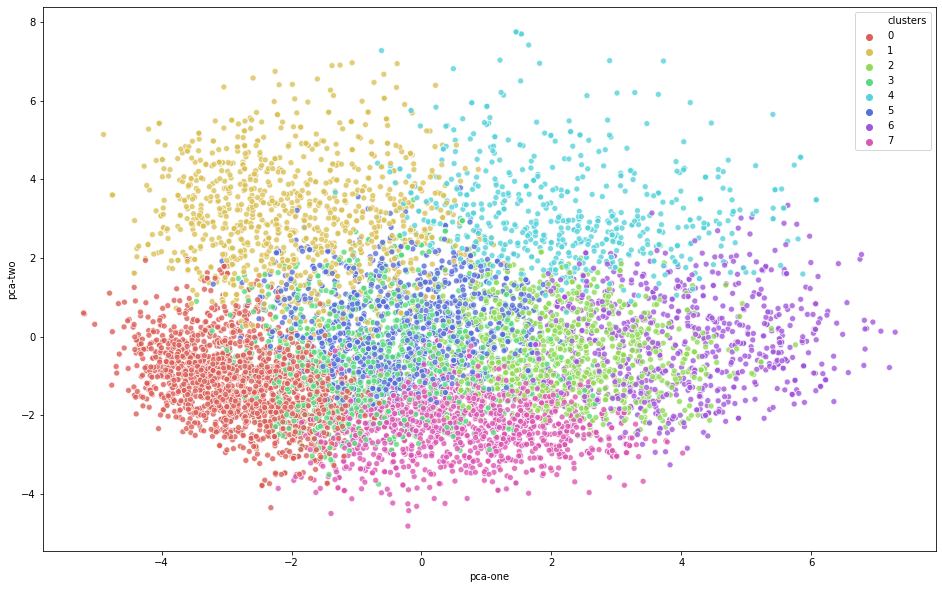

In [ ]:
compute_pca(by_tweet_it, data_it)

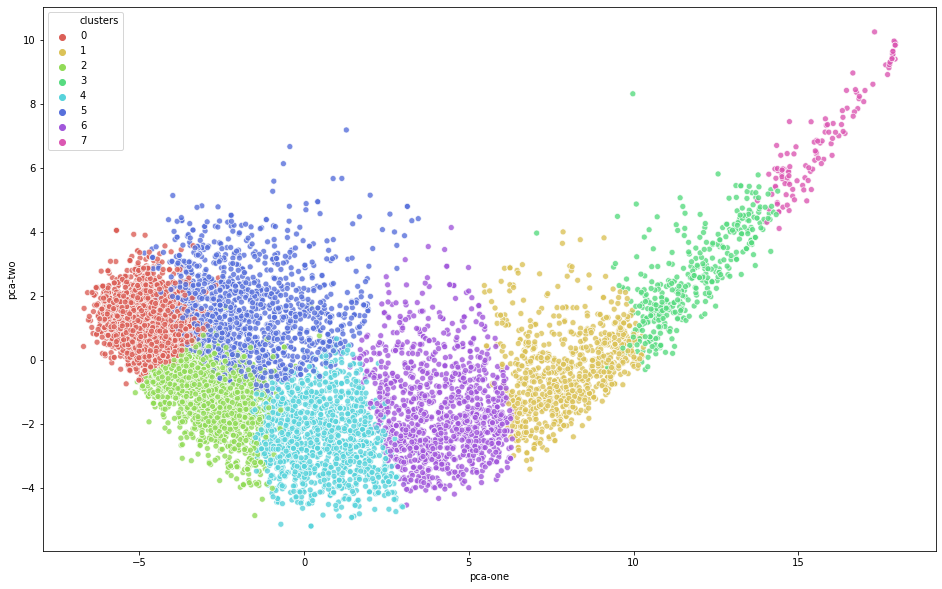

In [ ]:
compute_pca(by_tweet_en, data_en)

In [ ]:
temp_it = data_it.groupby(['id', 'text', 'clusters']).size().reset_index()

temp_it.columns = ['Id Autore', 'text','clus','conteggio']
temp_it.groupby(['Id Autore', 'text','clus'])['conteggio'].idxmax()
final_data_it = temp_it.loc[temp_it.groupby(['Id Autore', 'text'])['conteggio'].idxmax()][['Id Autore', 'text','clus']]

final_data_it.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id Autore  10000 non-null  int64 
 1   text       10000 non-null  object
 2   clus       10000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 312.5+ KB


In [ ]:
temp_en = data_en.groupby(['id', 'text', 'clusters']).size().reset_index()

temp_en.columns = ['Id Autore', 'text','clus','conteggio']
temp_en.groupby(['Id Autore', 'text','clus'])['conteggio'].idxmax()
final_data_en = temp_en.loc[temp_en.groupby(['Id Autore', 'text'])['conteggio'].idxmax()][['Id Autore', 'text','clus']]

final_data_en.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 0 to 9998
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id Autore  9999 non-null   int64 
 1   text       9999 non-null   object
 2   clus       9999 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 312.5+ KB


# **Riassemblamento parole **

In [ ]:

def compute_plot_termini_significativi(df, parole):

    for j in df['clusters'].unique():

        print("Cluster: ", j)

        subset = df[df['clusters'] == j].copy()
        index = subset.index.values

        words = []
        embeddings = []

        for b in index:
            #print("Index b: ", b)
            word = parole[b]['parole'].values()

            #print("Lunghezza frase: ", len(word))

            current_word = []
            final_words = []
            current_emb = []
            final_embs = []
            part_of_spelling = False
            i = 0
            sum_emb = 0
            new_med_emb = 0

            for a in word:
                part_of_spelling = False
                if a != '[PAD]':
                    if '#' in a:
                        part_of_spelling = True

                    if part_of_spelling == False:

                        if len(current_word) == 0:
                            current_word.extend(a)
                            current_emb.append(parole[b]['vettori'][0][i])
                        else:
                            final_words.append(current_word)
                            current_word = []
                            current_word.extend(a)

                            sum_emb = 0
                            for emb in current_emb:
                                sum_emb += emb
                            new_med_emb = sum_emb / len(current_emb)
                            final_embs.append(new_med_emb)
                            current_emb = []
                            current_emb.append(parole[b]['vettori'][0][i]) 
                    else:
                        current_word.extend(a[2:])
                        current_emb.append(parole[b]['vettori'][0][i])
    
                i += 1

            final_new_words = []

            for w in final_words:
                new_s = ""
                for c in w:
                    new_s += c
                final_new_words.append(new_s)

            words.extend(final_new_words)
            embeddings.extend(final_embs)

            #print("Totale parole: ", len(final_words))
            #print("Totale embs: ", len(final_embs))
            #print("----")
            #print(len(words))
            #print(len(embeddings))
            #print("----")

        unico = pd.DataFrame(data = {
            'parole' : words,
            'embs' : embeddings
        })

        unico = unico.groupby('parole')['embs'].apply(lambda x : np.mean(x)).reset_index()

        print(unico.shape)

        embeddings = unico['embs'].values

        m = PCA(n_components = 2, random_state = 212)
        pc = m.fit_transform(np.vstack(embeddings))

        indici, contrib = compute_contribution(m = m, principal_components=pc, k = 100)

        t = 0
        f = 0

        for ind in indici:
            if ind:
                t = t + 1
            else:
                f = f + 1
        print("Indici da prendere: ", t)
        print("Indici da non prendere: ", f)

        pc_df = pd.DataFrame(columns = ['Dim.1','Dim.2'], data = pc)
        pc_df['vocabulary'] = unico['parole'].values
        pc_df['weight'] = np.max(contrib, axis = 1)

        compute_word_plot(m, pc, pc_df, 50, 768, 1000, filter_indicator = 'None', save_path_figures='./{}'.format('new_cluster_'+str(j)))

########## TWEET IT #############
########## TWEET EN #############
Cluster:  2
(4555, 2)
[11.557091   5.9487386]
4555
4555
9110
K-value:  0.15303485095500946
Indici da prendere:  99
Indici da non prendere:  4456
[11.557091   5.9487386]
4555
4555
9110
K-value:  0.20111224055290222
Cluster:  0
(6760, 2)
[13.115258   4.0705385]
6760
6760
13520
K-value:  0.11510339379310608
Indici da prendere:  99
Indici da non prendere:  6661
[13.115258   4.0705385]
6760
6760
13520
K-value:  0.14615076780319214
Cluster:  5
(3764, 2)
[6.3329687 4.1907296]
3764
3764
7528
K-value:  0.15327583253383636
Indici da prendere:  98
Indici da non prendere:  3666
[6.3329687 4.1907296]
3764
3764
7528
K-value:  0.18479594588279724
Cluster:  4
(3993, 2)
[7.285697  5.6948504]
3993
3993
7986
K-value:  0.13883361220359802
Indici da prendere:  96
Indici da non prendere:  3897
[7.285697  5.6948504]
3993
3993
7986
K-value:  0.16602644324302673
Cluster:  6
(3553, 2)
[6.4646115 4.4377575]
3553
3553
7106
K-value:  0.15460610389

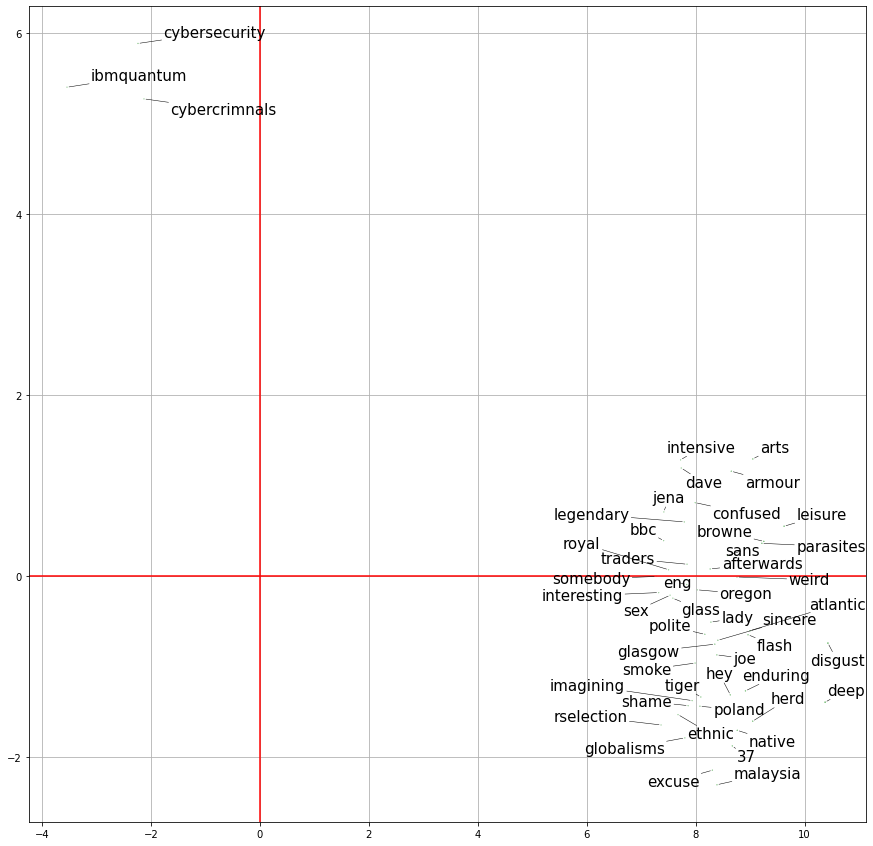

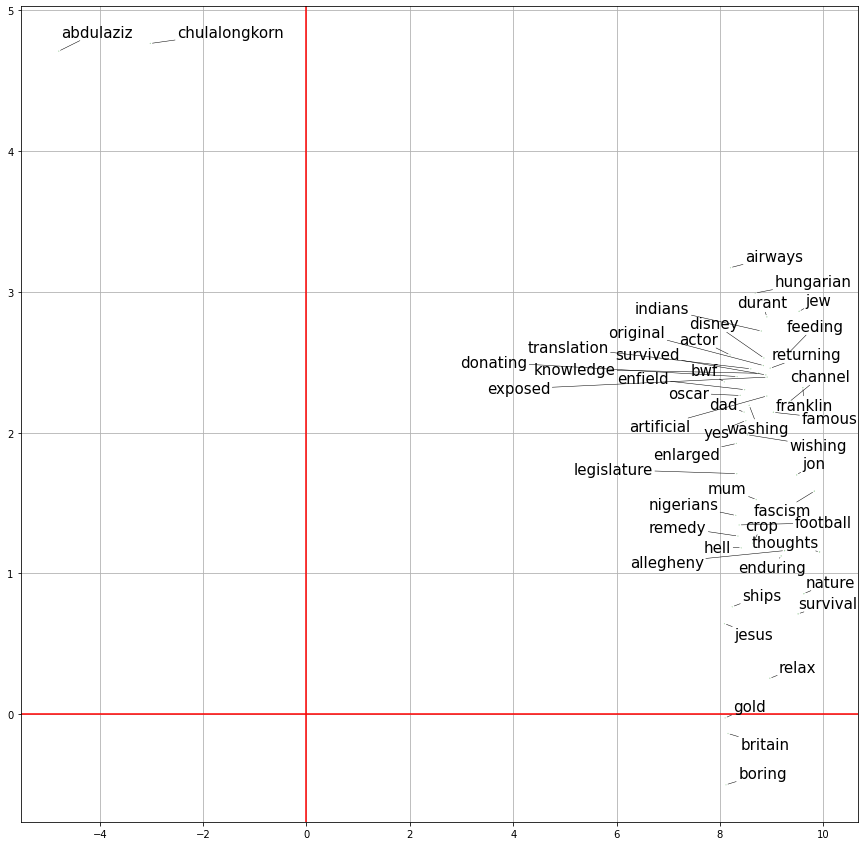

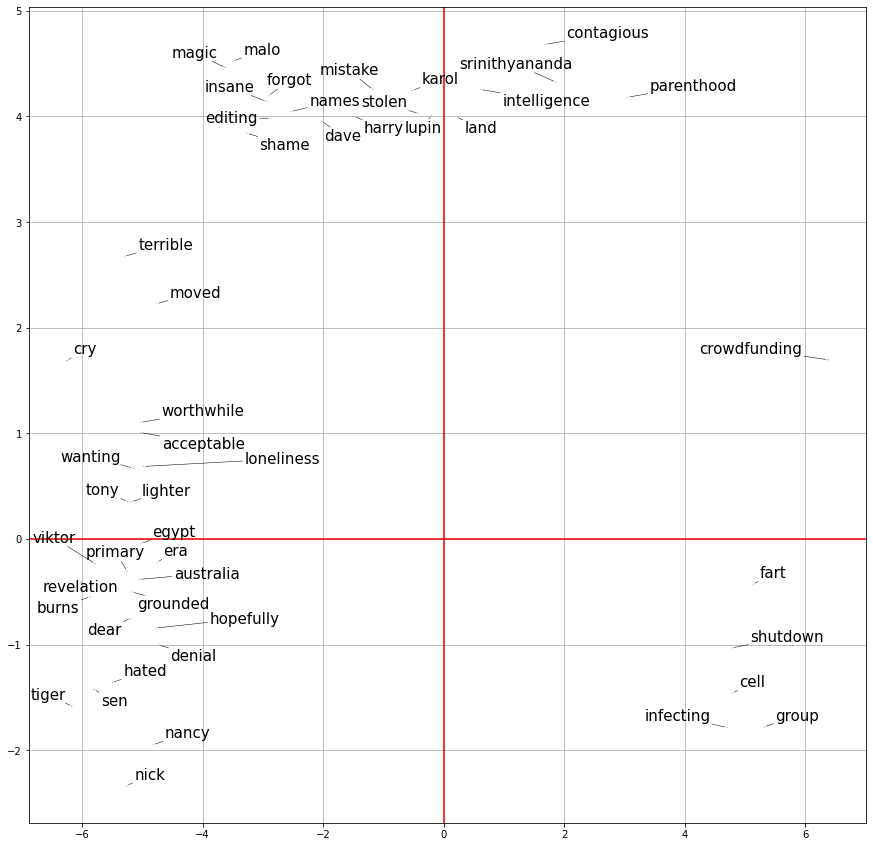

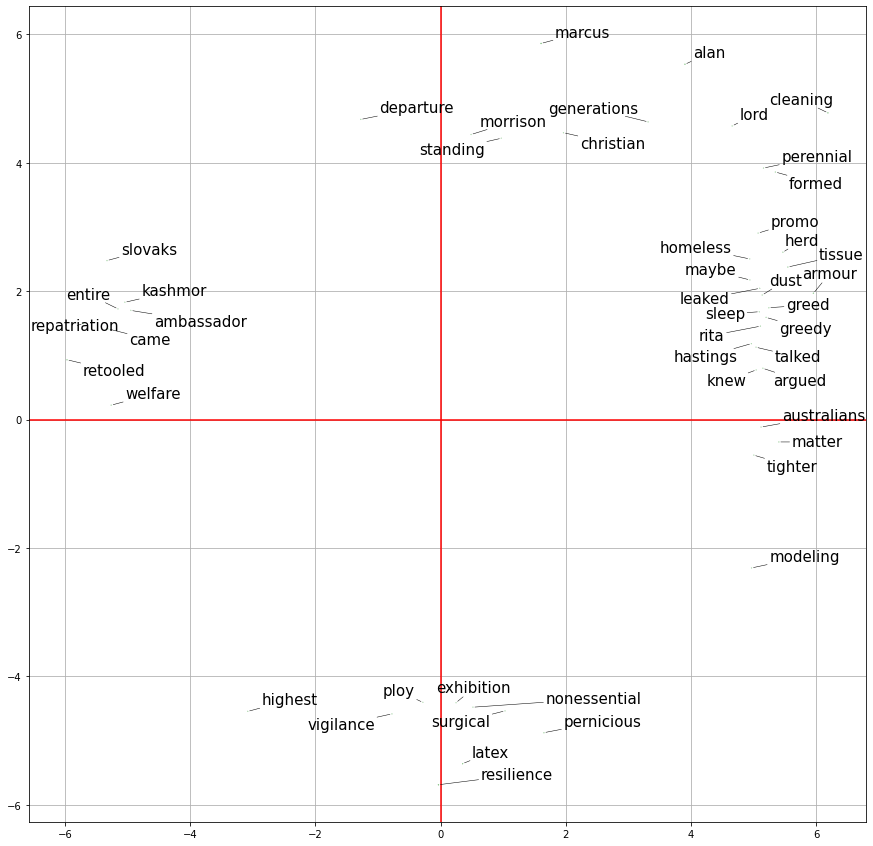

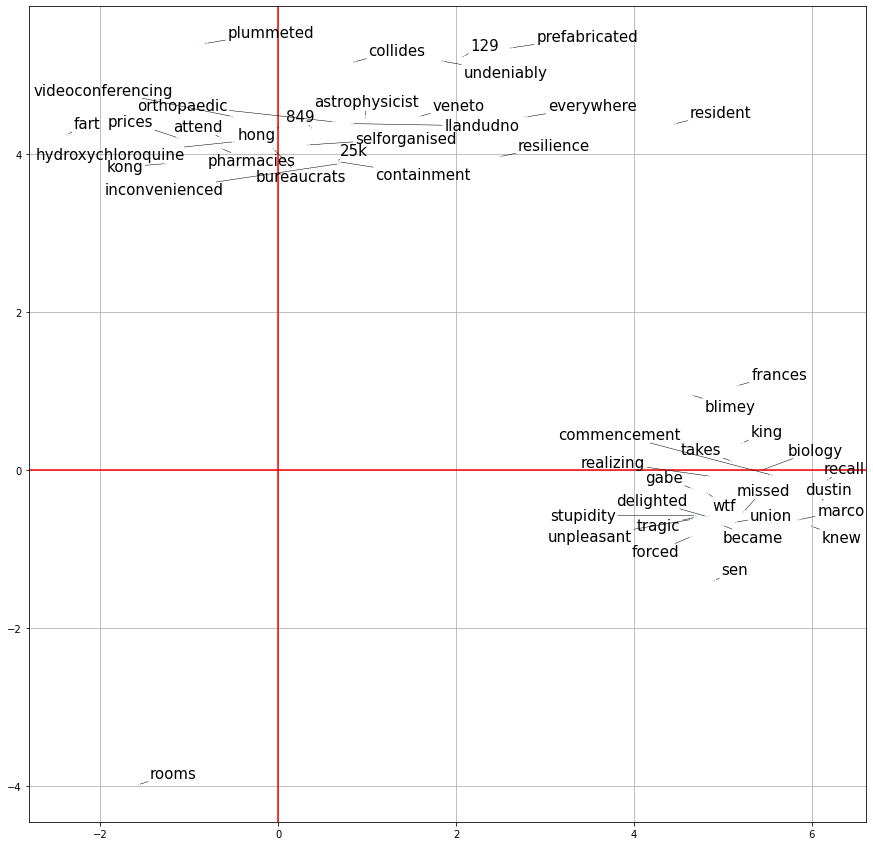

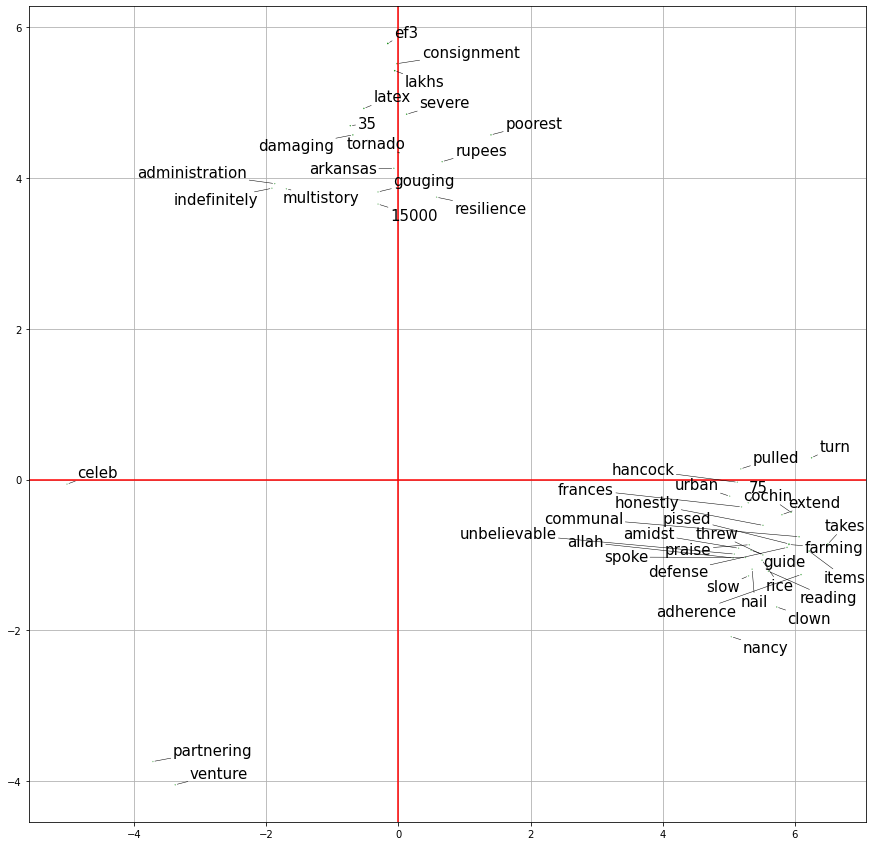

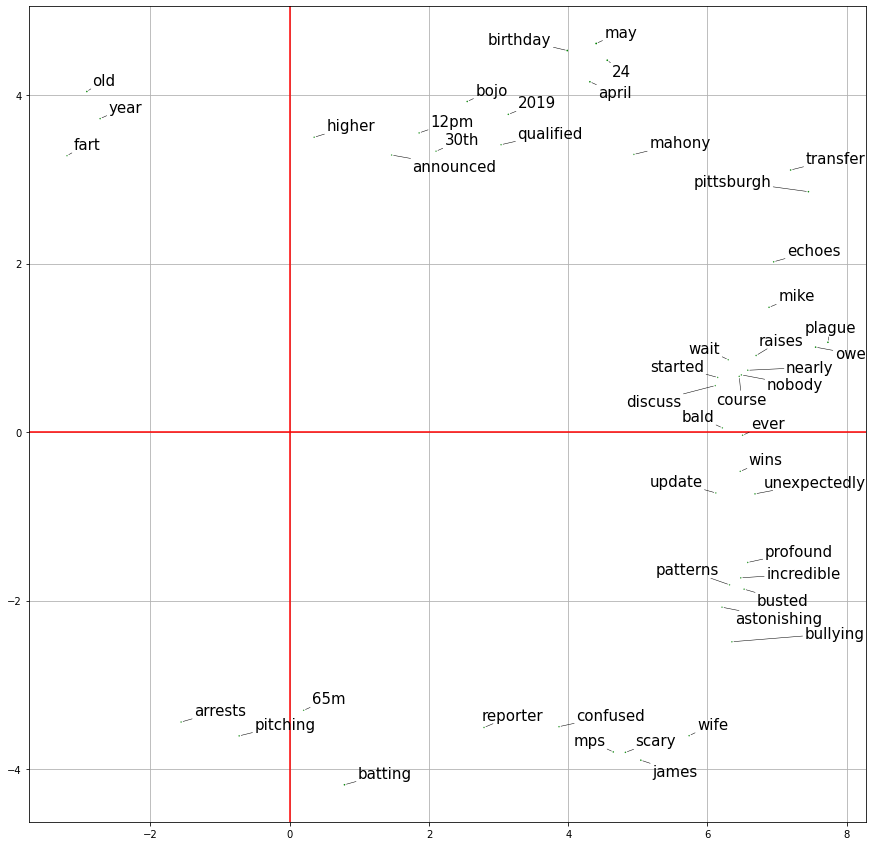

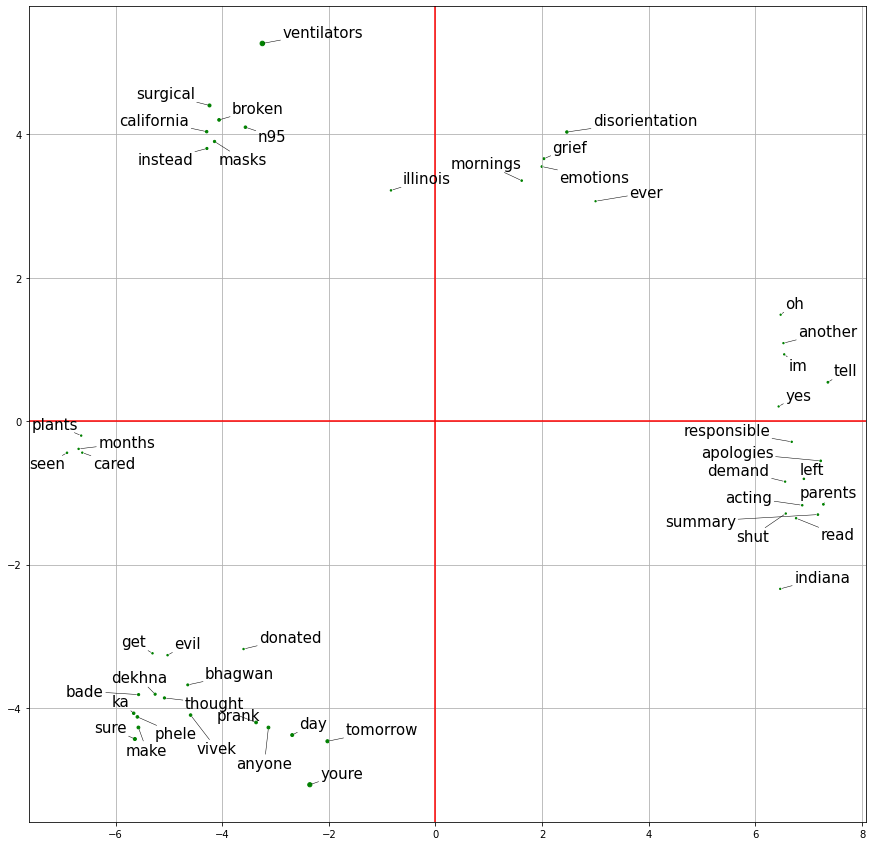

In [ ]:
print("########## TWEET IT #############")
#compute_plot_termini_significativi(data_it, load_parole_it)
print("########## TWEET EN #############")
compute_plot_termini_significativi(data_en, load_parole_en)

# Plot significative word

In [ ]:
def compute_contribution(m, principal_components, k=100):
    #calcolo contribution 
    sv2 = m.explained_variance_ratio_*100 #* m.explained_variance_ratio_*100 #* m.singular_values_
    print(sv2)
    print(len(principal_components.T[0]))

    print(len(principal_components.T[1]))

    contribution = 200*((principal_components*principal_components/len(principal_components.T[0])).T/sv2.reshape(2,1)).T #[:10]

    l = contribution.T[1].tolist()

    l.extend(contribution.T[0].tolist())

    print(len(l))

    k_value = np.sort(l)[-k:][0]

    print("K-value: ", k_value)
    
    indices_to_keep = (contribution.T[0] > k_value) | (contribution.T[1] > k_value)

    return indices_to_keep, contribution

def compute_word_plot(m, principalComponents,principalComponents_df, k, dim_size, dim_vocab, filter_indicator,save_path_figures, label_size= 15, point_size=2.3):
    indices_to_keep, _ = compute_contribution(m,principalComponents, k=k)
    #label_size = 15

    fig = plt.figure(figsize = (15,15))
    ax = fig.add_subplot(1,1,1) 
    colors = ['r', 'g', 'b', 'c', 'm', 'k', 'y']

    #piazzo i punti
    ax.scatter(principalComponents_df['Dim.1'][indices_to_keep]
               , principalComponents_df['Dim.2'][indices_to_keep]
               , c = 'g'
               , s =(principalComponents_df['weight'][indices_to_keep])**point_size,
                  label= principalComponents_df['vocabulary'][indices_to_keep])

    #genero le etichette
    texts = []        
    for x, y, s in zip(principalComponents_df['Dim.1'][indices_to_keep], 
                       principalComponents_df['Dim.2'][indices_to_keep], 
                       principalComponents_df['vocabulary'][indices_to_keep]):
        texts.append(plt.text(x, y, s, fontsize=label_size))
        
        
    #sistemo le etichette   
    adjust_text(texts, force_points=0.5, force_text=0.5,
                expand_points=(1.5, 1.5), expand_text=(1, 1),
                arrowprops=dict(arrowstyle="-", color='black', lw=0.5))


    plt.axhline(0, color='r')
    plt.axvline(0, color='r')

    ax.grid()
    l1 = str(np.round(np.array(m.explained_variance_ratio_*100)[0],3))
    l2 = str(np.round(np.array(m.explained_variance_ratio_*100)[1],3))
    plt.savefig(save_path_figures + 'terms_' + str(dim_size) + "_" + str(dim_vocab) + "_" + str(k) + filter_indicator +"_" + l1 + "_"+ l2 + ".png")

# Extract Emotion

In [ ]:
subseq_it_0 = final_data_it[final_data_it['clus'] == 0]
subseq_it_1 = final_data_it[final_data_it['clus'] == 1]
subseq_it_2 = final_data_it[final_data_it['clus'] == 2]
subseq_it_3 = final_data_it[final_data_it['clus'] == 3]
subseq_it_4 = final_data_it[final_data_it['clus'] == 4]
subseq_it_5 = final_data_it[final_data_it['clus'] == 5]
subseq_it_6 = final_data_it[final_data_it['clus'] == 6]
subseq_it_7 = final_data_it[final_data_it['clus'] == 7]

subseq_en_0 = final_data_en[final_data_en['clus'] == 0]
subseq_en_1 = final_data_en[final_data_en['clus'] == 1]
subseq_en_2 = final_data_en[final_data_en['clus'] == 2]
subseq_en_3 = final_data_en[final_data_en['clus'] == 3]
subseq_en_4 = final_data_en[final_data_en['clus'] == 4]
subseq_en_5 = final_data_en[final_data_en['clus'] == 5]
subseq_en_6 = final_data_en[final_data_en['clus'] == 6]
subseq_en_7 = final_data_en[final_data_en['clus'] == 7]


In [ ]:
subseq_it_0['text'].head(10).tolist()

['rt  coronavirus  travaglio su la7 mi aspetto che il ppe cacci orban dal partito e che ue obblighi l  ungheria a mettersi ',
 'rt  coronavirus  italia accetti aiuti esuli venezuela il governo e il ministro della salute roberto speranza d ',
 'rt  coronavirus  travaglio su la7 mi aspetto che il ppe cacci orban dal partito e che ue obblighi l  ungheria a mettersi ',
 'coronavirus  un caso alla rsa di bovino  riscontrato nella struttura  il girasole ',
 'coronavirus lariachetirala7 quel test sierologico presentato è positivo per le tasche di chi lo presenta o per t  ',
 'rt  coronavirus  travaglio su la7 mi aspetto che il ppe cacci orban dal partito e che ue obblighi l  ungheria a mettersi ',
 'coronavirus  appello a mattarella  bisogna urgentemente ridurre la popolazione nelle carceri ',
 'rt  coronavirus  multato perché al supermercato compra solo bottiglie di vino non sono beni necessari aggiornamento delle 1 ',
 'rt  coronavirus ammortizzatorisociali per pubbliciesercizi aggiornata o

In [ ]:
subseq_it_1['text'].head(10).tolist()

['rt  non sanno un cazzo inventano date ad minchiam  il picco doveva essere 7 giorni fa  ora è fra 10 giorni  in italia non d ',
 'covid19 abruzzo lintervista allassessore allambiente nicola campitelli  coronavirus restiamoacasa',
 'rt  a orban diciamo che bisogna combattere il coronavirus  non la democrazia  ecco la differenza tra noi e i nazionalpopu ',
 'rt  firenze ieri centinaia di risorseinps clandestini mentre spacciano 2424 indisturbati nella città di darionardella  quel ',
 'rt  coronavirus  nonostante i divieti girano film porno in luoghi pubblici  tre denunciati nel riminese coronavirusitali ',
 'coronavirus report iss su 355 cartelle cliniche solo 3 morti di covid  19 senza altre patologie sono 2629 gli opera  ',
 'rt  licl stima le infezioni di covid  19 in italia al 283  98  della popolazione  59 milioni di casi  capite perché i nu ',
 'da leggere sul giornale online cinquew news 31 marzo 2020 coronavirus  il 31 marzo 2020 lutto nei comuni ditalia ',
 'rt  sui giornali di

In [ ]:
subseq_it_3['text'].head(10).tolist()

['rt  che paese ipocrita l  italia  tutti ad acclamare ed elogiare i medici albanesi e poi le loro lauree non sono riconosciut ',
 'rt  questa prende anche il rdc e incita  pezzo di  complimenti alla digos i fucili siamo pronti ad alzarli noi grazie ai tuo ',
 'e poi dobbiamo stare a casa senza lamentarci e dobbiamo accogliere  che rabbia  ecco dove vanno i nostri  ',
 'rt  il quirinale prepara le bandiere a mezzasta  saranno esposte alle 12 in tutta italia  uniti nel lutto e sostegno reciproco ',
 'rt  quando arrivò il coronavirus  avevo fiducia  non apprezzo conte né questo governo  ma nonostante tutto credevo fosse i ',
 'meglio sarebbe stato fare una videoconferenza  tante persone assieme in uno spazio chiuso in questi frangenti  inca  ',
 'rt  quando verrà fuori che la maggior parte dei deceduti o infettati da coronavirus aveva fatto il vaccino antinfluenzale ',
 'rt  c  è la nona vittima lucana  coronavirus colpite fasce sempre più giovani  l  ultima vittima donato russo  noto im

In [ ]:
subseq_it_4['text'].head(10).tolist()

['queste merde non cambieranno mai idea  quindi al rogo',
 'sento voci per cui il 5maggio sia il giorno della libertà  non come prima  ma sempre libertà ',
 'rt  il quirinale con le bandiere a mezz  asta in segno di lutto per le vittime del coronavirus  mi associo in silenzio  ',
 'rt  quirinale  bandiere a mezz  asta in segno di lutto per le vittime del coronavirus ',
 'aggiornamento coronavirus  in veneto 258 casi in più di ieri sera  8159 casi totali  ',
 'rt  mamma anatra  a passeggio con i suoi anatroccoli su lungotevere aventino roma la natura si riprende i suoi spazi ',
 'quirinale a lutto  bandiere a mezzasta in ricordo delle vittime del coronavirus ',
 'nun faccio artro che pulì pavimenti  tacci vostra  coronavirus quarantena quarantinelife ',
 'rt  quirinale  bandiere a mezz  asta in segno di lutto per le vittime del coronavirus ',
 'rt  buon giorno a tutti  ricordiamoli così  un abbraccio a tutte le famiglie  abbassiamo la bandiera ma non abbassiamo la gu ']

In [ ]:
subseq_it_5['text'].head(10).tolist()

['rt  mentre mezza italia è senza mascherine compreso gli operatori sanitari  alle risorseinps clandestini gliele portano a cas ',
 'rt  ecco alla moviola il momento in cui abbiamo  guadagnato  100 milioni di aiuti americani grazie alla domanda di una giornalis ',
 'rt  non ho parole  giornalisti fisicamente presenti  distanze non rispettate  coronavirus confernzaospedalefieramilano ',
 'rt una bimba di 12 anni è morta in belgio a causa del coronavirus  lo hanno annunciato oggi le autorità sanitarie locali stan ',
 'iorestoacasa  le attività online del mav di ercolano  da tour virtuali nelle domus a film a 360 gr di',
 'rt  lnews coronavirus il nuovo ospedale in fieramilano è ormai realtà  il grazie del governatore e dellarc ',
 'rt  lho scritto laltro giorno  ora anche i morti di infarto li fanno passare per morti da coronavirus  poi si chiedono i ',
 'l  emergenza coronavirus ha fatto emergere il grande valore sociale del piccolo dettagliante e del negozio di vicina  ',
 'rt  la bell

In [ ]:
subseq_it_6['text'].head(10).tolist()

['quitadamo al sindaco uffici postali riaperti in molte frazioni  ma no a scansano  perché scansano poste  ',
 'rt  iorestoacasa non è uno slogan ma un comportamento indispensabile per proteggere la nostra salute e quella di chi è su ',
 'rt questo splendido video è dedicato a tutti coloro che combattono in prima linea in questa emergenza coronavirus b ',
 'rt  licl stima le infezioni di covid  19 in italia al 283  98  della popolazione  59 milioni di casi  capite perché i nu ',
 'dove trovare i soldi per l  emergenza coronavirus  lo curto propone condono tombale ',
 'l  italia al tempo del coronavirus  5  aggiornamento  l  ultimo sondaggio ipsos evidenzia che la percezione di mi  ',
 'rt  un minuto di raccoglimento  da tutti noi  per chi ha perso la vita e per tutti quelli che  in prima linea  stanno combattendo ',
 'rt  31marzo la bandiera italiana che in queste settimane sventola nei nostri quartieri e nelle nostre città oggi è a mezzasta  in ',
 'rt  la bontà è una virtù che può me

In [ ]:
subseq_it_7['text'].head(10).tolist()

['rt  ma perché continuate a sputare sentenze  poi parla proprio lei che è una abusiva  guardate la realtà  voi del csx sono de ',
 'rt  toninelli ho capito  si chiama pandemia perché tutti fanno il pane covid19 covid2019italia pandemia',
 'rt  pillole progressiste  posologia conte  100mila infettati e ho perso il numero dei morti  governo con dpcm  parlament ',
 'alla buonora cari vecchi alleati  last but not the least  ma dopo cina cuba albania  nun se po  senti ',
 'rt  sono rimasti soli  la proprietaria è morta x il coronavirus  x favore fate girare lappello affinché queste creature possa ',
 'rt  ecco che grazie a orban si affaccia lo scenario peggiore  lemergenza usata per limitare  liquidare la democrazia  fer ',
 ' io non so cosè un ventilatore polmonare in un paese normale  questi signori  riconoscendo palesemente la loro i  ',
 'penso anche io che questo possa essere lunico modo per tornare gradualmente alla normalità  coronavirus  litalia  ',
 'rt  raccolte le confidenze di 

In [ ]:
subseq_en_0['text'].head(10).tolist()

NameError: ignored